<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Assignment" data-toc-modified-id="Assignment-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Assignment</a></span></li><li><span><a href="#Prep" data-toc-modified-id="Prep-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prep</a></span></li><li><span><a href="#Get-the-data" data-toc-modified-id="Get-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Get the data</a></span></li><li><span><a href="#Use-the-lists-to-create-a-graph" data-toc-modified-id="Use-the-lists-to-create-a-graph-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Use the lists to create a graph</a></span></li><li><span><a href="#Graph-Analysis-Metrics" data-toc-modified-id="Graph-Analysis-Metrics-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Graph Analysis Metrics</a></span></li><li><span><a href="#Create-a-csv-file-for-Gephi" data-toc-modified-id="Create-a-csv-file-for-Gephi-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Create a csv file for Gephi</a></span></li></ul></div>

### Assignment

Graph databases are a type of NoSQL database, created to address the limitations of relational databases. While the graph model explicitly lays out the dependencies between nodes of data, the relational model and other NoSQL database models link the data by implicit connections. Graph databases, by design, allow simple and fast retrieval of complex hierarchical structures that are difficult to model.

In this assignment.. 
Load a graph database of your choosing from a text file or other source. If you take a
large network dataset from the web (such as from https://snap.stanford.edu/data/), please
feel free at this point to load just a small subset of the nodes and edges.

Create basic analysis on the graph, including the graph’s diameter, and at least one other
metric of your choosing.

Use a visualization tool of your choice (Neo4j, Gephi, etc.) to display information.

### Prep

In [0]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

### Get the data

The Stanford collection of network graph databases includes one of roads in Pennylvania.  This dataset will be used for this assignement (link to Pennsylvania Roads dataset: https://snap.stanford.edu/data/roadNet-PA.html)

In [0]:
#%cd C:\Users\user\Documents\00_Applications_DataScience\CUNY\DATA620\data620_repository\Week2_Part1
%cd /Users/williesmalls/Documents/School/CUNY SPS/01 - Courses/00 - Web Analytics/KJW_CUNY_DATA_620/Week2_Part1

/Users/williesmalls/Documents/School/CUNY SPS/01 - Courses/00 - Web Analytics/KJW_CUNY_DATA_620/Week2_Part1


In [0]:
#load each column in the input file as a list of integers
infile = 'roadNet-PA.txt'

linecount = 0
col1_list = []
col2_list = []

with open(infile,'r') as fileref:
    lines = fileref.readlines()
    for line in lines:
        linecount += 1
        if linecount > 4:
            col1, col2 = line.split()
            col1_list.append(int(col1))
            col2_list.append(int(col2))
            


### Use the lists to create a graph

In [0]:
#Select a smaller set of nodes to utilize for this assignment
small_col1_list = col1_list[:100]
small_col2_list = col2_list[:100]

In [0]:
#Load the data from the lists to a graph
g1 = nx.Graph()

#nodes
g1.add_nodes_from(small_col1_list)
g1.add_nodes_from(small_col2_list)
connect_all_list = [(13,0), (13,11)]

#edges
edges_list = list(zip(small_col1_list, small_col2_list))
g1.add_edges_from(edges_list)
g1.add_edges_from(connect_all_list)

# list(g1.nodes(data=True))[0:5]
# list(g1.edges(data=True))[0:5]
# nx.draw(g1, with_labels=True)

### Graph Analysis Metrics

In [0]:
#Calculate diameter using network x function
print(f'Using NetworkX function, the diameter is {nx.diameter(g1)}')

#Calculate the diameter by finding the maximum eccentricity value
excentricity_dict = nx.eccentricity(g1)

max_excentricity = 0
for v in excentricity_dict:
    if excentricity_dict[v] > max_excentricity:
        max_excentricity = excentricity_dict[v]

print(f'Max eccentricity, which equates to the diameter, is {max_excentricity}')  

Using NetworkX function, the diameter is 13
Max eccentricity, which equates to the diameter, is 13


In [0]:
#Additional Metrics
print(f'Number of nodes {g1.number_of_nodes()}')
print(f'Number of edges {g1.number_of_edges()}')
print(f'Center is {nx.center(g1)}')
print(f'Periphery is {nx.periphery(g1)}')
print(f'Radius is {nx.radius(g1)}')

#most important neighbors (connections)
#5 way is bad.  five roads cross at one point. 
#More things can happen.  
#Usually just four (east, west, south, north)
#Planning issue 

### J - possibly color nodes.  
print('Top five intersection with the most connections')
(pd.Series({n: len(list(g1.neighbors(n))) 
            for n in g1.nodes()})
 .sort_values(ascending=False)
 .head(5)
)

Number of nodes 60
Number of edges 67
Center is [5, 9, 15]
Periphery is [3861, 3872, 389, 4005, 58, 69, 76, 197]
Radius is 7
Top five intersection with the most connections


6      5
0      4
309    4
22     4
20     4
dtype: int64

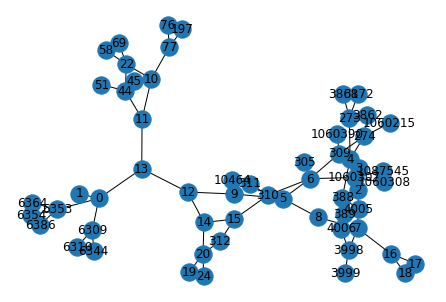

In [0]:
#Graph of intersections
nx.draw(g1, with_labels=True)

### Create a csv file for Gephi

The code below creates a csv file, which is then read into Gephi (a graph database package).  Gephi is then used to create a visualization of the graph.  Note that NetworkX could also be used to create the graph, but for this assignment a graph database is to be used.

In [0]:
#Load the two lists to a dataframe
#indata = pd.DataFrame(columns=['node1', 'node2']
indata = pd.DataFrame()

indata['node1'] = small_col1_list
indata['node2'] = small_col2_list

indata.head(2)

,node1,node2
0,0,1
1,0,6309


In [0]:
#export to csv so that Gephi can read in the data
indata.to_csv('roadNet-PA-subset.csv', index=False)

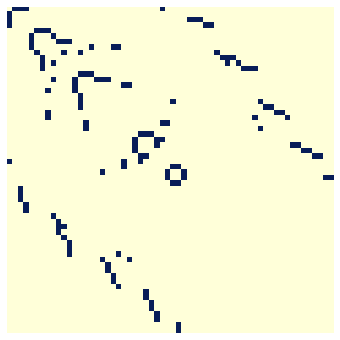

In [0]:
#adjacency matrix 
from nxviz import MatrixPlot

m = MatrixPlot(g1)
m.draw()
plt.show()
#bi-directional (for the most part), symetric along the diagonal, 
#Makes sense - roads are using bi-directional, west <-> East, North <-> South